# Фігурки школярів на переходах та заспокоєння трафіку

В останні роки на українських дорогах побільшало яскравих фігурок школярів, які по ідеї мають привертати увагу водіїв та покращувати безпеку пішохідних переходів. Чи працює це? І які є інші способи "заспокоювати" трафік та чи працюють вони?

Я порівнюватиму швидкості проїзду переходів до та після запровадження засобів заспокоєння трафіку. Дані про швидкості братимуться з набору даних [Uber Movement](https://movement.uber.com/explore/kyiv/speeds/query). Статистична значимість отриманих результатів перевірятиметься [критерієм Колмогорова-Смірнова для двох вибірок](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test#Two-sample_Kolmogorov–Smirnov_test).

In [6]:
#я почав виносити основний функціонал в бібліотеку, вона тут:
#https://github.com/DmytroTym/urban/blob/master/urban_lib.py
from urban_lib import Uber_movement_data, Visualizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

vis = Visualizer()
vis.set_style()

In [2]:
#функція, що рахує і виводить середню зміну швидкості
def change(speeddata, date11, date12, date21, date22, streetname):
    before = speeddata.loc[(speeddata['date'] >= pd.to_datetime(date11)) & 
                           (speeddata['date'] <= pd.to_datetime(date12))]\
    ['speed_kph_mean'].to_numpy()
    after = speeddata.loc[(speeddata['date'] >= pd.to_datetime(date21)) & 
                          (speeddata['date'] <= pd.to_datetime(date22))]\
    ['speed_kph_mean'].to_numpy()
    print("Швидкість проїзду переходу на вулиці {} в середньому зменшилась на {:.1f} км/год".\
          format(streetname, before.mean() - after.mean()))
    return before, after

#функція, що виводить результати тесту Колмогорова-Смірнова
def print_kstest(before, after):
    print("pvalue тесту Колмогорова-Смірнова: {:.5f}".\
          format(ks_2samp(before, after).pvalue))

## Фігурки школярів

Фігурки на переходах почали з'являтись в Києві помітно пізніше, ніж у регіонах. Про те, як змінилась аварійність на переходах з фігурками можна почитати в [моєму минулому пості](https://nbviewer.jupyter.org/github/DmytroTym/urban/blob/master/Road%20safety%20measures%20analysis%20Kyiv.ipynb#Пластикові-школярі). Проблема порівнянь даних про аварійність в тому, що таких даних дуже мало. Зазвичай з них не вдається зробити статистично значущих висновків, тому ми порівнюватимемо саме швидкості проїзду переходів. На усіх наступних графіках яскраво червона лінія - рухомі середні значення швидкості з вікном у $2$ дні. Велика червона смуга - стандартне відхилення від середнього значення.

Ось як змінилася швидкість на одному з переходів на Сирці, обладнаних фігурками:

In [3]:
hrekova = Uber_movement_data()
hrekova.load_from_file([(2019, 9), (2019, 10)], node_ids = [754107577, 256575942])

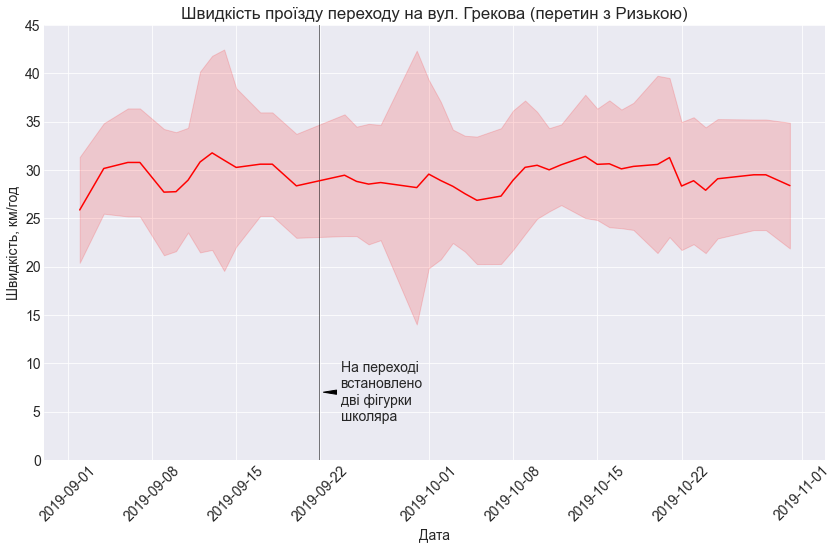

Швидкість проїзду переходу на вулиці Грекова в середньому зменшилась на 0.6 км/год
pvalue тесту Колмогорова-Смірнова: 0.92953


In [7]:
vis.plot_rolling_averages([(hrekova.data['date'].to_numpy(), hrekova.data['speed_kph_mean'].to_numpy())], 
                          "Швидкість проїзду переходу на вул. Грекова (перетин з Ризькою)", 
                          ['red'], "Дата", "Швидкість, км/год", window = pd.Timedelta('1 day'),
                          stds = [hrekova.data['speed_kph_stddev'].to_numpy()], ylim = (0, 45), rotation = 45)
vis.put_annotation(pd.to_datetime('2019/09/22'), 7, pd.Timedelta('2 hours'),
                   "На переході\nвстановлено\nдві фігурки\nшколяра")
plt.show()

hrekova_before, hrekova_after = change(hrekova.data,'2019/09/01', '2019/09/21', 
                                       '2019/09/27', '2019/11/01', "Грекова")
print_kstest(hrekova_before, hrekova_after)

Зменшення швидкості дуже незначне, тест впевнено відкидає зміни після встановлення фігурок.

Тепер розглянемо вже встановлених комунальниками школярів, вони стоять на нерегульованому переході [на вулиці Заболотного](https://www.facebook.com/dtp.kiev.ua/photos/a.366712043494695/1457548521077703/). Це дуже небезпечний перехід, на якому чи не щорічно гинуть пішоходи. Чи допомогли школярі?

In [8]:
zabolotnoho = Uber_movement_data()
zabolotnoho.load_from_file([(2019, 10), (2019, 11)], node_ids = [254277372, 254277392])

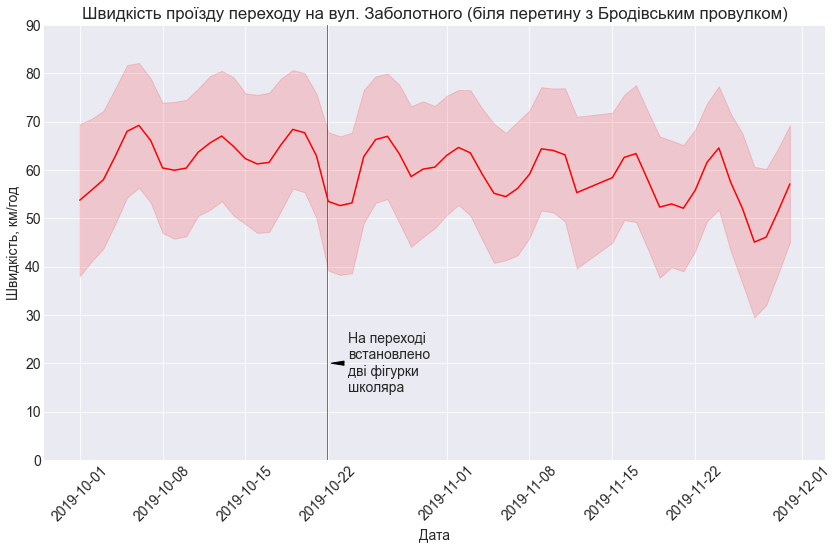

Швидкість проїзду переходу на вулиці Заболотного в середньому зменшилась на 0.2 км/год
pvalue тесту Колмогорова-Смірнова: 0.03981


In [17]:
vis.plot_rolling_averages([(zabolotnoho.data['date'].to_numpy(), zabolotnoho.data['speed_kph_mean'].to_numpy())], 
                          "Швидкість проїзду переходу на вул. Заболотного (біля перетину з Бродівським провулком)", 
                          ['red'], "Дата", "Швидкість, км/год", window = pd.Timedelta('1 day'),
                          stds = [zabolotnoho.data['speed_kph_stddev'].to_numpy()], ylim = (0, 90), rotation = 45)
vis.put_annotation(pd.to_datetime('2019/10/22'), 20, pd.Timedelta('2 hours'),
                   "На переході\nвстановлено\nдві фігурки\nшколяра")
plt.show()

zabolotnoho_before, zabolotnoho_after = change(zabolotnoho.data, '2019/10/01', '2019/10/21', 
                                               '2019/10/26', '2019/11/01', "Заболотного")
print_kstest(zabolotnoho_before, zabolotnoho_after)

Перші пару днів після встановлення фігурки, здається, лякали водіїв. Але вже в наступний тиждень швидкості повернулись на попередній рівень. Тест вагається і на стандартному рівні значимості $0.05$ відкинув би гіпотезу про відсутність змін. Тобто, школярі могли якимось чином вплинути на поведінку водіїв, але середню швидкість не зменшили. Далі, у листопаді, спостерігається поступовий спад швидкості, але він є і на інших відрізках Заболотного, тому навряд пов'язаний з фігурками і скоріше є сезонним.

## Острівці безпеки

Острівці безпеки дають пішоходам можливість безпечно зупинитися на середині переходу. Але, окрім того, вони мають знижувати швидкості автомобілів за рахунок звуження смуг. Подивимось, чи працює це:

In [10]:
revutskoho = Uber_movement_data()
revutskoho.load_from_file([(2019, 8), (2019, 9), (2019, 10)], node_ids = [442348016, 2088175054])

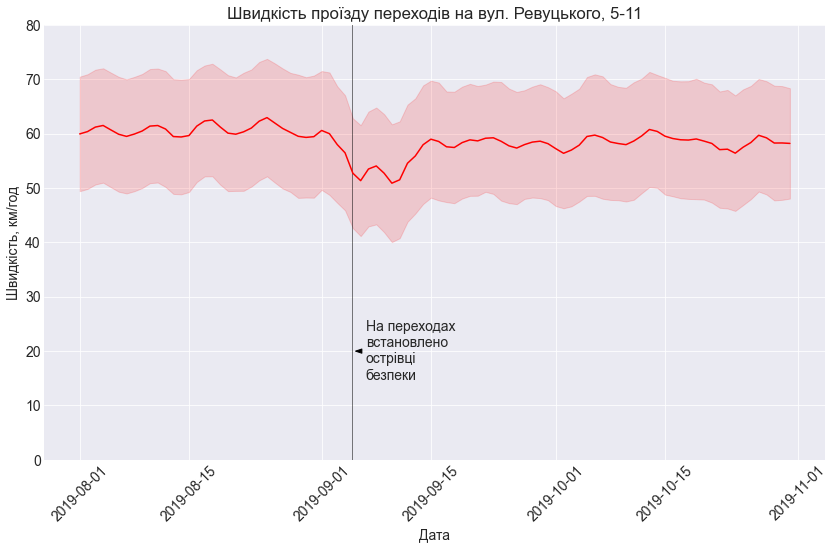

Швидкість проїзду переходу на вулиці Ревуцького в середньому зменшилась на 2.4 км/год
pvalue тесту Колмогорова-Смірнова: 0.00000


In [11]:
vis.plot_rolling_averages([(revutskoho.data['date'].to_numpy(), revutskoho.data['speed_kph_mean'].to_numpy())], 
                          "Швидкість проїзду переходів на вул. Ревуцького, 5-11", 
                          ['red'], "Дата", "Швидкість, км/год", window = pd.Timedelta('1 day'),
                          stds = [revutskoho.data['speed_kph_stddev'].to_numpy()], ylim = (0, 80), rotation = 45)
vis.put_annotation(pd.to_datetime('2019/09/05'), 20, pd.Timedelta('2 hours'),
                   "На переходах\nвстановлено\nострівці\nбезпеки")
plt.show()

revutskoho_before, revutskoho_after = change(revutskoho.data,'2019/08/01', '2019/08/28', 
                                             '2019/09/13', '2019/11/01', "Ревуцького")
print_kstest(revutskoho_before, revutskoho_after)

Можливо, це не дуже добре видно на графіку, але швидкість зменшилась в середньому на $2.4$ км/год. Тест впевнено показує статистичну значущість зменшення. Але все одно, швидкості на цьому (і на деяких інших нерегульованих переходах з острівцями) залишаються занадто високими, а переходи - занадто небезпечними. Схожі висновки (але без статистичної значущості) можна отримати, [аналізуючи статистику аварійності](https://nbviewer.jupyter.org/github/DmytroTym/urban/blob/master/Road%20safety%20measures%20analysis%20Kyiv.ipynb#Острівці-безпеки).

## Лежачі поліцейські

Просто в якості прикладу подивимось, як виглядає зменшення швидкості на переході, де встановлений лежачий поліцейський. Наприклад, ЦОДР [встановив](https://www.facebook.com/kyivtrafficmanagement/posts/1328765233952780) лежачого поліцейського на нерегульованому переході на проспекті Григоренка. Це дуже сильно знизило як середню швидкість авто, так і стандартне відхилення від середньої швидкості:

In [12]:
hryhorenka = Uber_movement_data()
hryhorenka.load_from_file([(2019, 9), (2019, 10)], node_ids = [662716395, 3745227004])

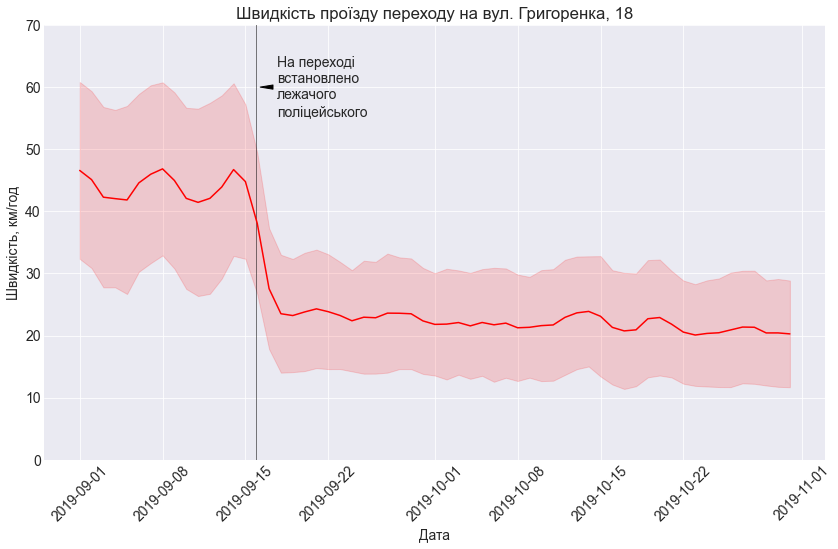

Швидкість проїзду переходу на вулиці Григоренка в середньому зменшилась на 22.1 км/год
pvalue тесту Колмогорова-Смірнова: 0.00000


In [13]:
vis.plot_rolling_averages([(hryhorenka.data['date'].to_numpy(), hryhorenka.data['speed_kph_mean'].to_numpy())], 
                          "Швидкість проїзду переходу на вул. Григоренка, 18", 
                          ['red'], "Дата", "Швидкість, км/год", window = pd.Timedelta('1 day'),
                          stds = [hryhorenka.data['speed_kph_stddev'].to_numpy()], ylim = (0, 70), rotation = 45)
vis.put_annotation(pd.to_datetime('2019/09/16'), 60, pd.Timedelta('2 hours'),
                   "На переході\nвстановлено\nлежачого\nполіцейського")
plt.show()

hryhorenka_before, hryhorenka_after = change(hryhorenka.data,'2019/09/01', '2019/09/14', 
                                             '2019/09/20', '2019/11/01', "Григоренка")
print_kstest(hryhorenka_before, hryhorenka_after)

Отже, пластикові школярі не працюють, острівці безпеки працюють, але не можуть зробити безпечним вбивчий перехід, а лежачі поліцейські дуже добре знижують швидкість авто (але так, вони незручні).

Дякую за увагу!